In [1]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 12.9 MB/s eta 0:00:00


In [12]:
import numpy as np
import pandas as pd
import arch
from arch import arch_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.ar_model as smt
from statsmodels.tsa.stattools import adfuller, kpss,acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import signal

In [40]:
def generate_garch_11(n=1000, alpha0=0.1, alpha1=0.15, beta1=0.4, seed=44, sigma_noise=0.1):
    np.random.seed(seed)
    epsilon_t = np.random.normal(loc=0, scale=sigma_noise, size=n)  # random noise
    sigma = np.zeros(n)
    for t in range(1, n):
        # Use epsilon_t[t-1] instead of the entire array
        sigma[t] = alpha0 + alpha1 * (sigma[t-1] * epsilon_t[t])**2 + beta1 * (sigma[t-1])**2
    # Calculate the variance
    sigma_squared = np.sqrt(sigma)
    for t in range(1, n):
        sigma_squared[t] = sigma_squared[t] + epsilon_t[t]
    return sigma_squared

In [47]:
print(generate_garch_11(n=1000, alpha0=0.1, alpha1=0.15, beta1=0.8, seed=44, sigma_noise=0.1)[:100])

[0.         0.4478635  0.45328297 0.17023537 0.18425953 0.15964923
 0.51706316 0.33985469 0.32584794 0.38663289 0.2347632  0.31305017
 0.21277491 0.39163815 0.23593927 0.36717072 0.43716984 0.31936751
 0.41366282 0.21013865 0.21207255 0.35307332 0.3097877  0.18998154
 0.28279458 0.45129504 0.26051737 0.33359855 0.29196872 0.35039249
 0.36600946 0.39020571 0.38312686 0.4136191  0.37370555 0.35064325
 0.27967314 0.02396624 0.29161045 0.25156274 0.26077458 0.15742278
 0.40618788 0.14478131 0.37295012 0.30754876 0.37429347 0.41812759
 0.53205256 0.46832503 0.43697953 0.47567491 0.33597042 0.34011189
 0.28305771 0.36114663 0.44240906 0.32915125 0.33099702 0.26723498
 0.49061625 0.33295052 0.38722836 0.311232   0.37740384 0.1492585
 0.34438568 0.26938202 0.46194358 0.40868547 0.3030662  0.25869836
 0.23677264 0.38725866 0.26181286 0.50133421 0.2259489  0.26498127
 0.23001803 0.18525208 0.37014734 0.25005286 0.44688401 0.33426009
 0.14148306 0.24461941 0.32536369 0.45422093 0.27773677 0.29748

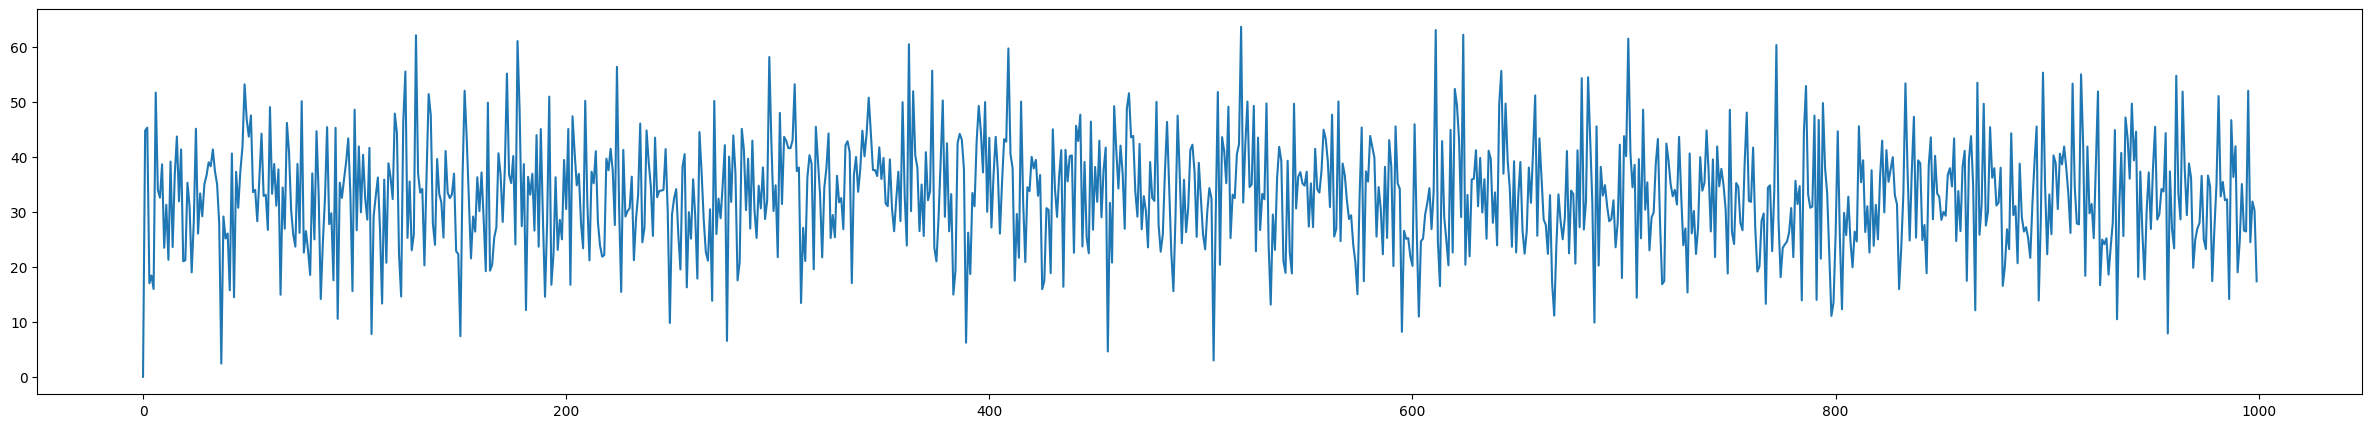

In [60]:
#Rescale dataset such that .fit() is happy
garch_11_dataset = 100 * generate_garch_11(n=1000, alpha0=0.1, alpha1=0.15, beta1=0.8, seed=44, sigma_noise=0.1)

plt.figure(figsize=(30, 5)) # Adjust the figure size for a longer plot
plt.plot(garch_11_dataset)
plt.show()


[55.55555556  2.25733634  2.33100233 38.46153846 11.23595506]
[1016.92855344 1034.05092608 1064.82806581 1093.732373   1153.27629598]


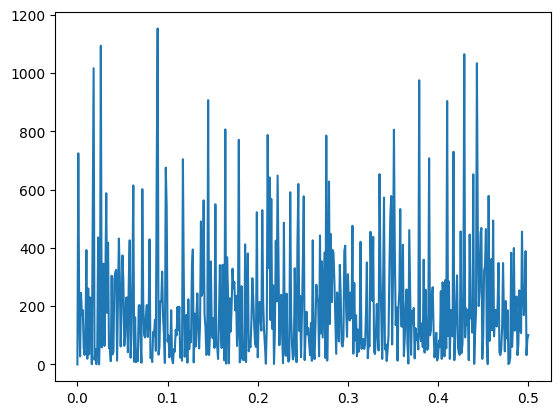

In [61]:
#No Seasonality to decompose
frequencies, power_spectrum = signal.periodogram(garch_11_dataset, fs=1) # generate the periodogram
plt.plot(frequencies, power_spectrum) # plot the periodogram
# get the index of the five largest elements of power_spectrum to get the frequency
print(1/frequencies[np.argsort(power_spectrum)[-5:]])
print(np.sort(power_spectrum)[-5:])

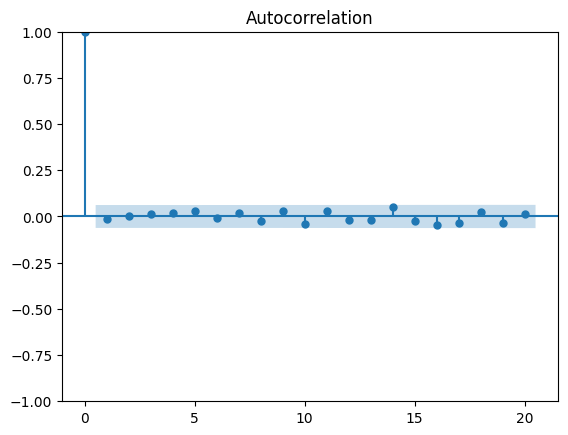

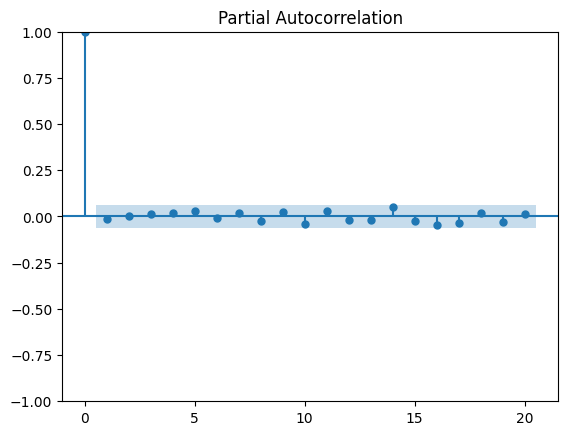

In [62]:
plot_acf(garch_11_dataset, lags=20)
plot_pacf(garch_11_dataset, lags=20)
plt.show()

In [63]:
model_GARCH = arch.arch_model(garch_11_dataset, vol='GARCH', p=1,q=1)
result_grach = model_GARCH.fit()
print(result_grach.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4298.401635536263
Iteration:      2,   Func. Count:     14,   Neg. LLF: 3727.0877009343176
Iteration:      3,   Func. Count:     19,   Neg. LLF: 3727.0953134343345
Iteration:      4,   Func. Count:     25,   Neg. LLF: 3727.047646529394
Iteration:      5,   Func. Count:     30,   Neg. LLF: 3727.0437525446127
Iteration:      6,   Func. Count:     35,   Neg. LLF: 3727.033506919138
Iteration:      7,   Func. Count:     40,   Neg. LLF: 3727.008664734507
Iteration:      8,   Func. Count:     45,   Neg. LLF: 3726.953217102782
Iteration:      9,   Func. Count:     50,   Neg. LLF: 3726.8457875898494
Iteration:     10,   Func. Count:     55,   Neg. LLF: 3726.773014208473
Iteration:     11,   Func. Count:     60,   Neg. LLF: 3726.7270837606393
Iteration:     12,   Func. Count:     65,   Neg. LLF: 3726.7085967923003
Iteration:     13,   Func. Count:     70,   Neg. LLF: 3726.7056321756636
Iteration:     14,   Func. Count:     75,   Neg. LLF: 372